In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [28]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.CYAN + 'Colored Text' + color.END)

Colored Text


In [3]:
df = pd.read_csv("../input/heart-disease-uci/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Description
<br>

<h3>Predictor Variables:</h3>
1. <b>age</b>
<br>2. <b>sex</b>: (0,1)
<br>3. <b>cp</b>: chest pain type (0,1,2,3)
<br>4. <b>trestbps</b>: resting blood pressure
<br>5. <b>chol</b>: serum cholestrol level in mg/dl
<br>6. <b>fbs</b>: fasting blood sugar (0, 1 at >120 mg/dl)
<br>7. <b>restecg</b>: resting ecg results (0,1,2)
<br>8. <b>thalach</b>: maximum heart rate achieved
<br>9. <b>exang</b>: exercise induced angina (chest pain due to insufficient blood flow to the heart muscle)
<br>10. <b>oldpeak</b>: ST depression observed in ECG induced by exercise relative to rest
<br>11. <b>slope</b>: slope of the ST segment during peak exercise
<br>12. <b>ca</b>: number of major vessels colored by flouroscopy (0,1,2,3,4)
<br>13. <b>thal</b>: normal, fixed defect, reversable defect (0,1,2,3)


<br>
<h3>Target Variable:</h3>
<b>target</b>: abnormal/normal wrt heart disease (1/0)

<br><br>

In [35]:
print(color.BOLD+"Value counts of Categorical Predictor Variables: \n"+color.END)
print(color.CYAN+"\nSex:\n{}".format(df['sex'].value_counts())+color.END)
print(color.RED+"\nChest Pain Type:\n{}".format(df['cp'].value_counts())+color.END)
print(color.CYAN+"\nFasting Blood Sugar Type (>120 mg/dl):\n{}".format(df['fbs'].value_counts())+color.END)
print(color.RED+"\nRest ECG results:\n{}".format(df['restecg'].value_counts())+color.END)
print(color.CYAN+"\nExercise induced Angina:\n{}".format(df['exang'].value_counts())+color.END)
print(color.RED+"\nST exercise induced slope:\n{}".format(df['slope'].value_counts())+color.END)
print(color.CYAN+"\nNumber of major vessels colored by flouroscopy:\n{}".format(df['ca'].value_counts())+color.END)
print(color.RED+"\nType of defect:\n{}".format(df['thal'].value_counts())+color.END)

Value counts of Categorical Predictor Variables: 


Sex:
1    207
0     96
Name: sex, dtype: int64

Chest Pain Type:
0    143
2     87
1     50
3     23
Name: cp, dtype: int64

Fasting Blood Sugar Type (>120 mg/dl):
0    258
1     45
Name: fbs, dtype: int64

Rest ECG results:
1    152
0    147
2      4
Name: restecg, dtype: int64

Exercise induced Angina:
0    204
1     99
Name: exang, dtype: int64

ST exercise induced slope:
2    142
1    140
0     21
Name: slope, dtype: int64

Number of major vessels colored by flouroscopy:
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

Type of defect:
2    166
3    117
1     18
0      2
Name: thal, dtype: int64


In [38]:
print(color.BOLD+"Value counts of Categorical Target Variable: \n"+color.END)
print(color.YELLOW+"\nNormal/Abnormal wrt Heart Disease:\n{}".format(df['target'].value_counts())+color.END)

Value counts of Categorical Target Variable: 


Normal/Abnormal wrt Heart Disease:
1    165
0    138
Name: target, dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


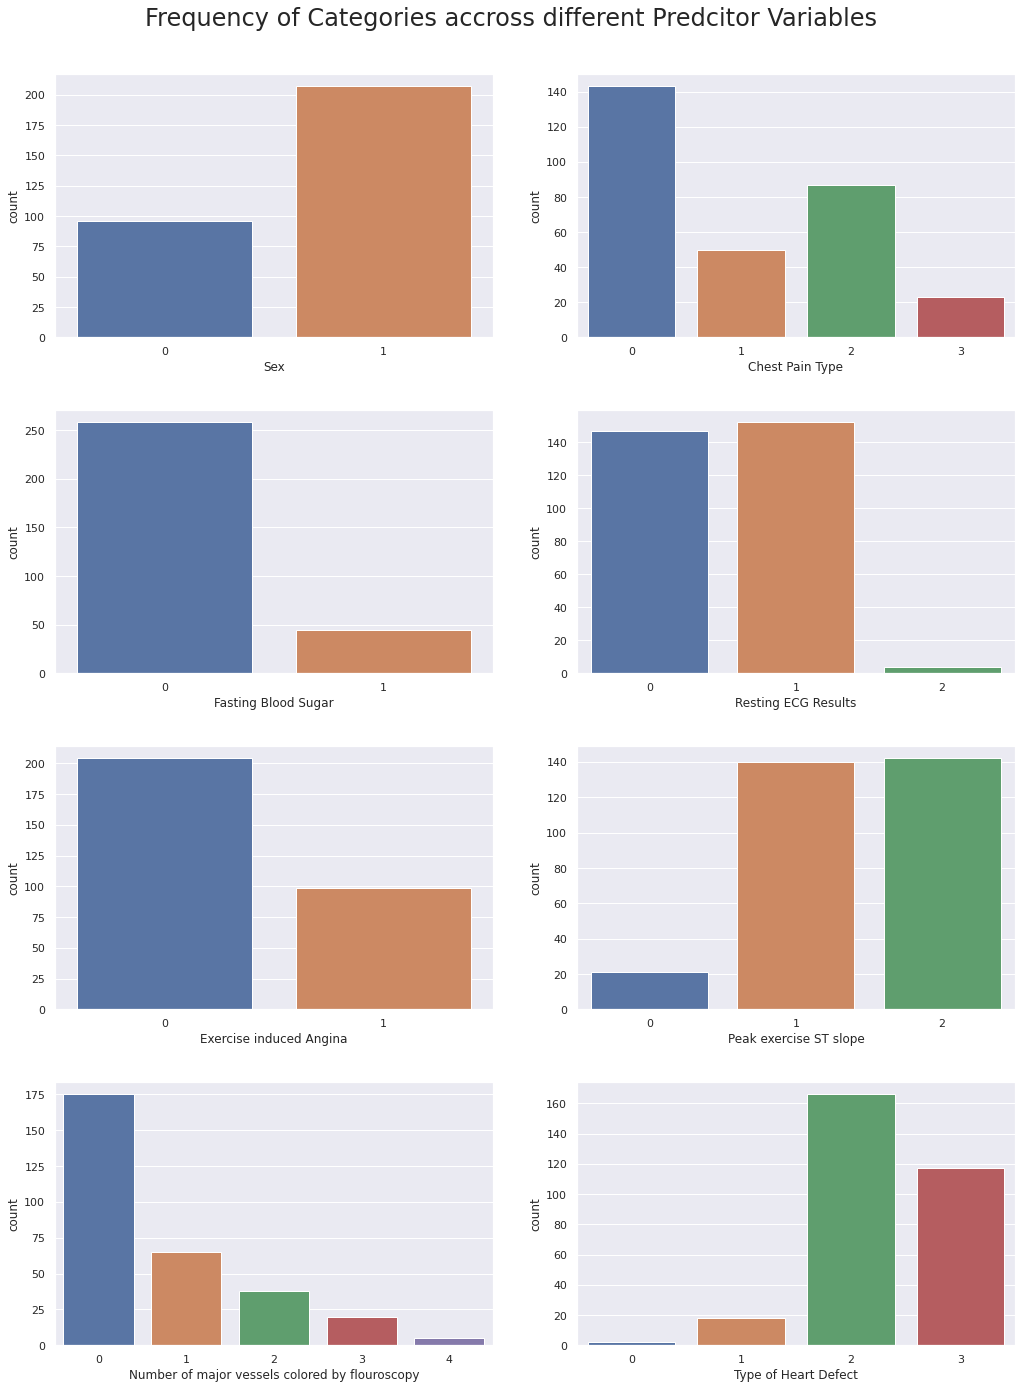

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style = 'darkgrid')

fig, axis = plt.subplots(4,2, figsize=(15,20)) # figsize=(width, height) of each of the subplot

sns.countplot(data = df, x = 'sex', ax=axis[0][0])
axis[0][0].set(xlabel='Sex')

sns.countplot(data = df, x = 'cp', ax=axis[0][1])
axis[0][1].set(xlabel='Chest Pain Type')

sns.countplot(data = df, x = 'fbs', ax=axis[1][0])
axis[1][0].set(xlabel='Fasting Blood Sugar')

sns.countplot(data = df, x = 'restecg', ax=axis[1][1])
axis[1][1].set(xlabel='Resting ECG Results')

sns.countplot(data = df, x = 'exang', ax=axis[2][0])
axis[2][0].set(xlabel='Exercise induced Angina')

sns.countplot(data = df, x = 'slope', ax=axis[2][1])
axis[2][1].set(xlabel='Peak exercise ST slope')

sns.countplot(data = df, x = 'ca', ax=axis[3][0])
axis[3][0].set(xlabel='Number of major vessels colored by flouroscopy')

sns.countplot(data = df, x = 'thal', ax=axis[3][1])
axis[3][1].set(xlabel='Type of Heart Defect')

fig.suptitle("Frequency of Categories accross different Predcitor Variables", size=24)
fig.tight_layout(pad=3.0)

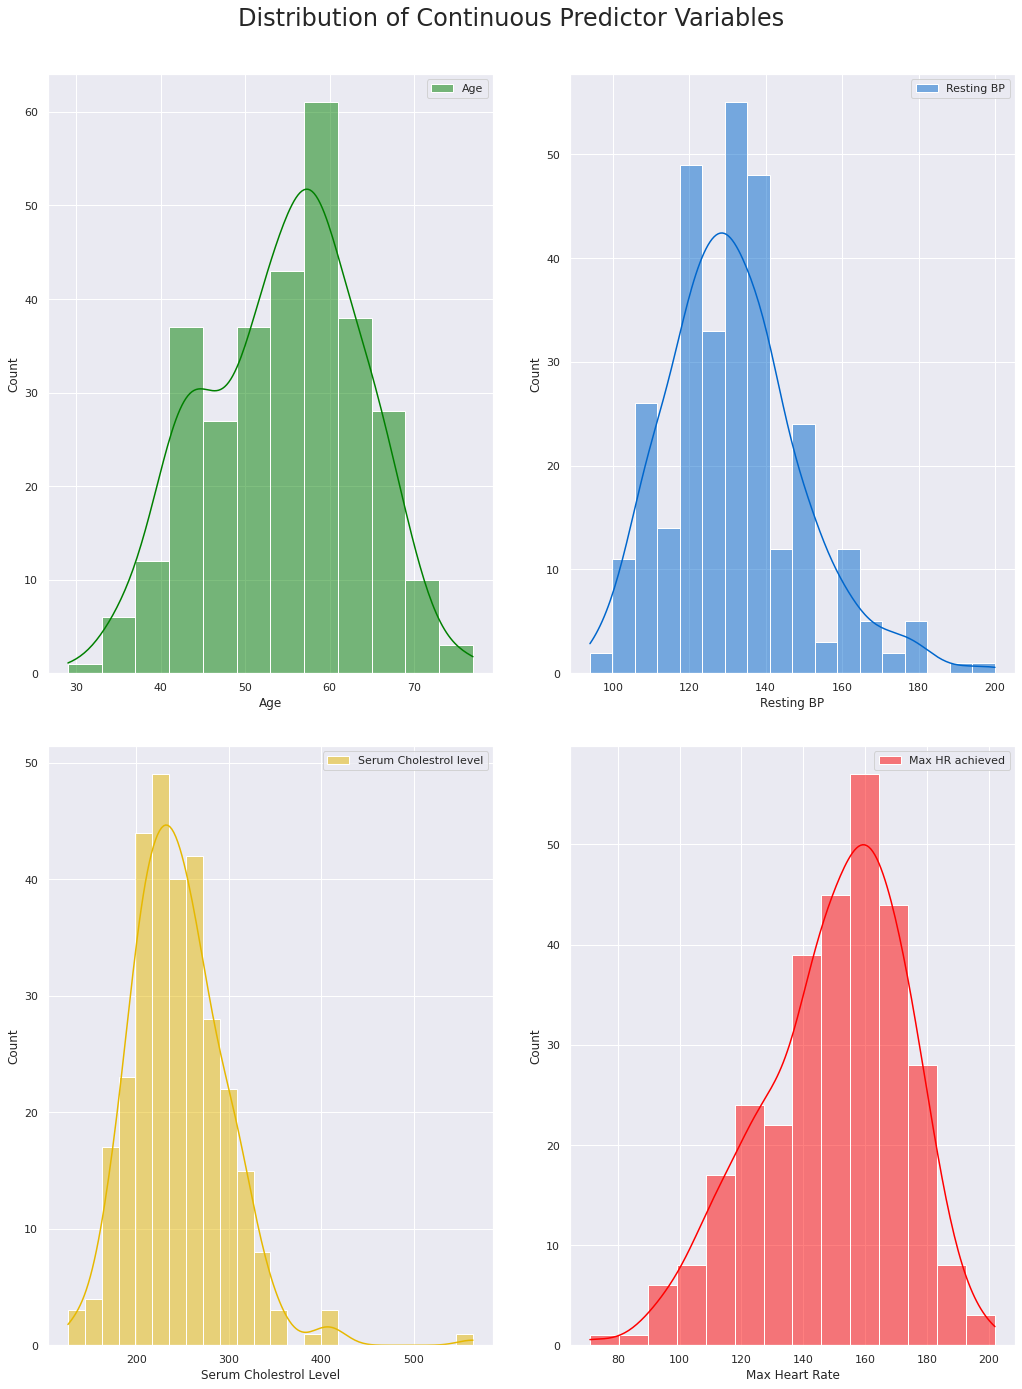

In [84]:
fig, axis = plt.subplots(2,2, figsize=(15,20))

sns.histplot(df.age, color='green', label='Age', kde=True, ax=axis[0][0])
axis[0][0].set(xlabel='Age')
axis[0][0].legend()

sns.histplot(df.trestbps, color='#0066cc', label='Resting BP', kde=True, ax=axis[0][1])
axis[0][1].set(xlabel="Resting BP")
axis[0][1].legend()

sns.histplot(df.chol, color='#e6b800', label='Serum Cholestrol level', kde=True, ax= axis[1][0])
axis[1][0].set(xlabel='Serum Cholestrol Level')
axis[1][0].legend()

sns.histplot(df.thalach, color='red', label='Max HR achieved', kde=True, ax=axis[1][1])
axis[1][1].set(xlabel='Max Heart Rate')               
axis[1][1].legend()

fig.suptitle("Distribution of Continuous Predictor Variables", size=24)
fig.tight_layout(pad=3.0)

<Figure size 720x720 with 0 Axes>

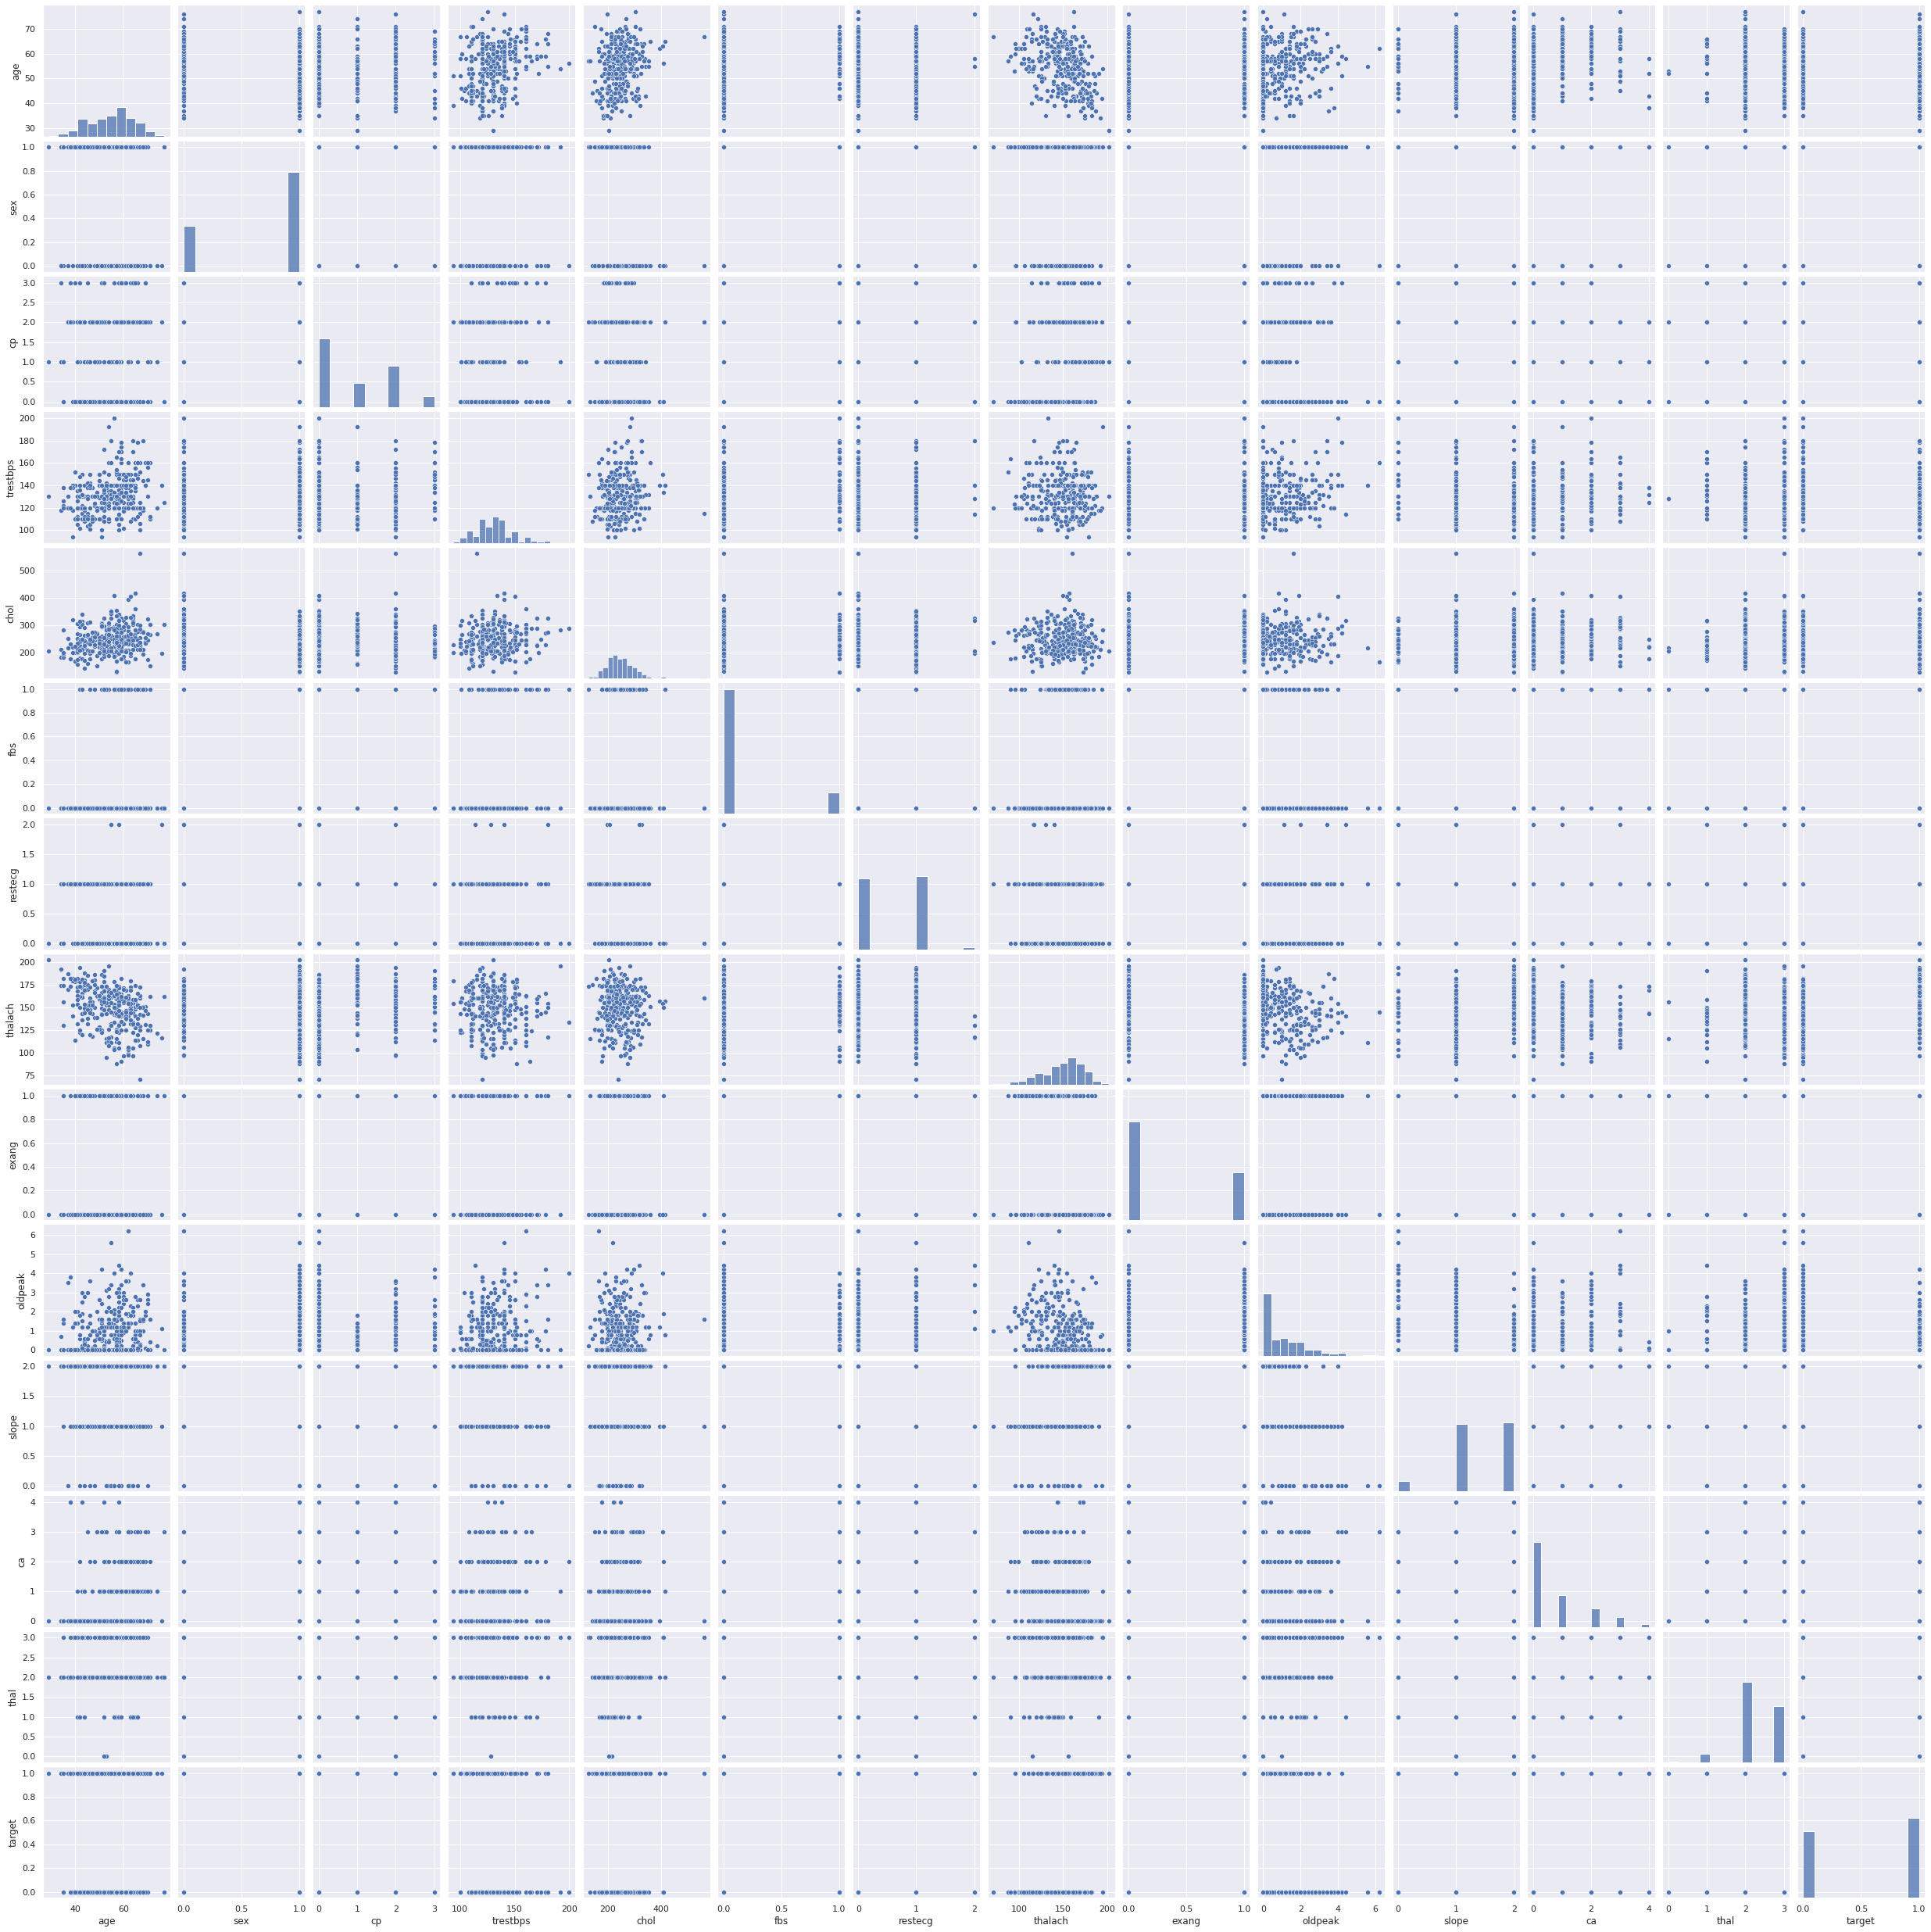

In [89]:
# pair plot - all possible scatter plots
fig = plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

# To be continued...